## Quantum Chemistry Simulation Methods for Excited States Calculations using Time-dependent VQE

Time-dependent Variational Quantum Eigensolver (TD-VQE) offers a significant advancement in the field of quantum chemistry, particularly for simulating excited states in molecular systems. Traditional quantum chemistry methods, while effective, face limitations when it comes to capturing the dynamic behavior of electrons, especially in systems where excited states play a critical role, such as photochemistry, catalysis, or energy transfer processes. TD-VQE extends the widely used Variational Quantum Eigensolver (VQE) method to address these challenges, allowing for more accurate simulation of time-dependent quantum systems.

In classical quantum chemistry, calculating excited states often involves methods like Time-Dependent Density Functional Theory (TD-DFT) or Configuration Interaction Singles (CIS), which approximate the excited state wavefunction. While these methods are valuable, they come with trade-offs in terms of accuracy and computational scalability, particularly for larger, more complex molecules. This is where quantum computing promises to make a transformative impact.

TD-VQE leverages the power of quantum computers to solve time-dependent Schrödinger equations by evolving a variational wavefunction in time. This approach builds on the static VQE by optimizing the wavefunction parameters not just to minimize the energy of a static Hamiltonian, but to track the evolution of the quantum state under a time-varying Hamiltonian. This enables the simulation of excited states with high precision, which is essential for understanding phenomena like electronic transitions and molecular dynamics under external perturbations.

The time evolution in TD-VQE is governed by the McLachlan’s variational principle, which ensures that the time-dependent wavefunction remains as close as possible to the true quantum evolution. The quantum computer solves the dynamics of the system at each time step, updating the parameters of the wavefunction accordingly. This makes it particularly effective for simulating systems under the influence of time-dependent external fields, such as laser pulses in pump-probe experiments or molecular reactions driven by photoexcitation.

In practical terms, TD-VQE allows quantum chemists to access a broader range of molecular properties, such as excitation energies, lifetimes of excited states, and transition dipole moments. It also provides a pathway toward simulating non-equilibrium processes, where traditional quantum chemistry methods may struggle.

For engineers working in the quantum computing space, TD-VQE represents a bridge between static quantum simulations and the more dynamic, real-time behavior of quantum systems. As quantum hardware continues to improve, TD-VQE could become a cornerstone of excited state quantum chemistry, offering new insights into materials design, drug discovery, and other fields where understanding excited states is crucial.

The future of quantum chemistry is dynamic, and methods like TD-VQE exemplify how quantum algorithms can evolve to tackle the most challenging problems in simulating molecular behavior. For professionals in the quantum domain, mastering TD-VQE will be key to unlocking the full potential of quantum simulations in chemical and material sciences.

The **time evolution operator** is given by:

$$
U(t) = e^{-i H t}
$$

The **static Hamiltonian** can be represented as:

$$
H_{\text{static}} = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}
$$

The **state evolution** is described by:

$$
|\psi(t)\rangle = U(t) |\psi(0)\rangle
$$

The **time-dependent Hamiltonian** is represented as:

$$
H_{\text{time\_dependent}} = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}
$$

The measurement outcome can be expressed as:

$$
\langle \psi | M | \psi \rangle
$$


In [1]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.circuit.library import EfficientSU2
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector, plot_state_qsphere, plot_state_city, plot_histogram
from qiskit.visualization.state_visualization import plot_state_paulivec
from qiskit.quantum_info import Pauli, SparsePauliOp, Statevector, partial_trace
from qiskit_algorithms import VQE
from qiskit.primitives import Estimator
from scipy.linalg import expm
from qiskit_algorithms.optimizers import COBYLA
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Initialize simulator
simulator = AerSimulator()

In [3]:
# Define static and time-dependent Hamiltonians
H_static = np.array([[1, 0], [0, -1]])  # Pauli-Z Hamiltonian
H_time_dependent = np.array([[0, 1], [1, 0]])  # Pauli-X Hamiltonian

In [4]:
# Total time evolution parameters
time_steps = 100
total_time = 10  # Total time of evolution
delta_t = total_time / time_steps  # Time step

In [5]:
# Function for evolving a state with a Hamiltonian
def time_evolve(state, H, t):
    U = expm(-1j * H * t)  # Compute the time-evolution operator
    return U @ state.reshape(H.shape[0], -1)  # Reshape state to match Hamiltonian

In [6]:
# Initial quantum state
num_qubits = 2
ansatz = EfficientSU2(num_qubits)

In [7]:
# Initializing VQE with estimator
estimator = Estimator()
vqe = VQE(estimator, ansatz, optimizer=COBYLA())

In [8]:
# The number of parameters should match the number of parameters in the ansatz
num_parameters = ansatz.num_parameters
parameters = np.random.rand(num_parameters)  # Example parameters of correct size
vqe_circuit = ansatz.assign_parameters(parameters)

In [9]:
# Initialize statevector from the circuit
initial_statevector = Statevector.from_instruction(vqe_circuit)

In [10]:
# Time-evolve the statevector over multiple time steps
state = initial_statevector.data
for step in range(time_steps):
    t = step * delta_t
    # Alternate between static and time-dependent Hamiltonian
    if step % 2 == 0:
        state = time_evolve(state, H_static, delta_t)
    else:
        state = time_evolve(state, H_time_dependent, delta_t)
    state = state.flatten()  # Ensure state remains a column vector

In [11]:
# Convert final statevector into the Statevector object for visualization
final_statevector = Statevector(state.flatten())  # Ensure it's a column vector

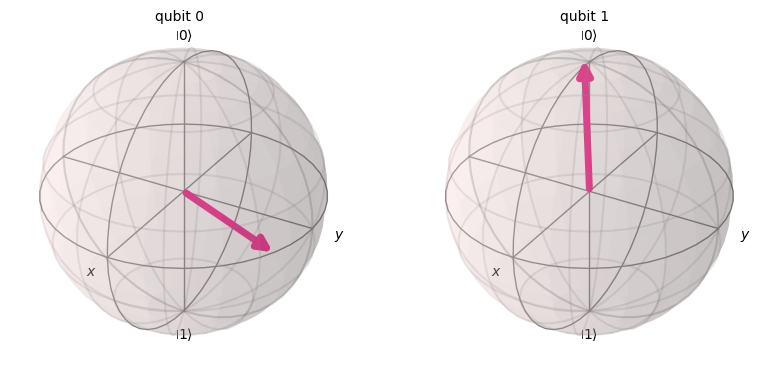

In [12]:
# Plot the Bloch multivector 
plot_bloch_multivector(final_statevector)
plt.show()

<Figure size 640x480 with 0 Axes>

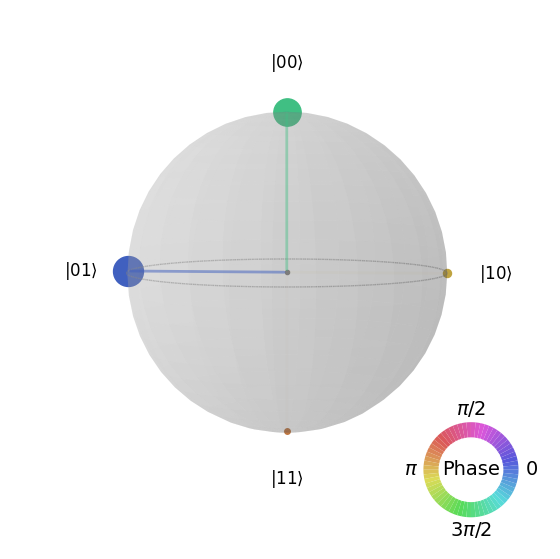

In [13]:
# Plot the QSphere
plt.figure()
plot_state_qsphere(final_statevector)
plt.show()

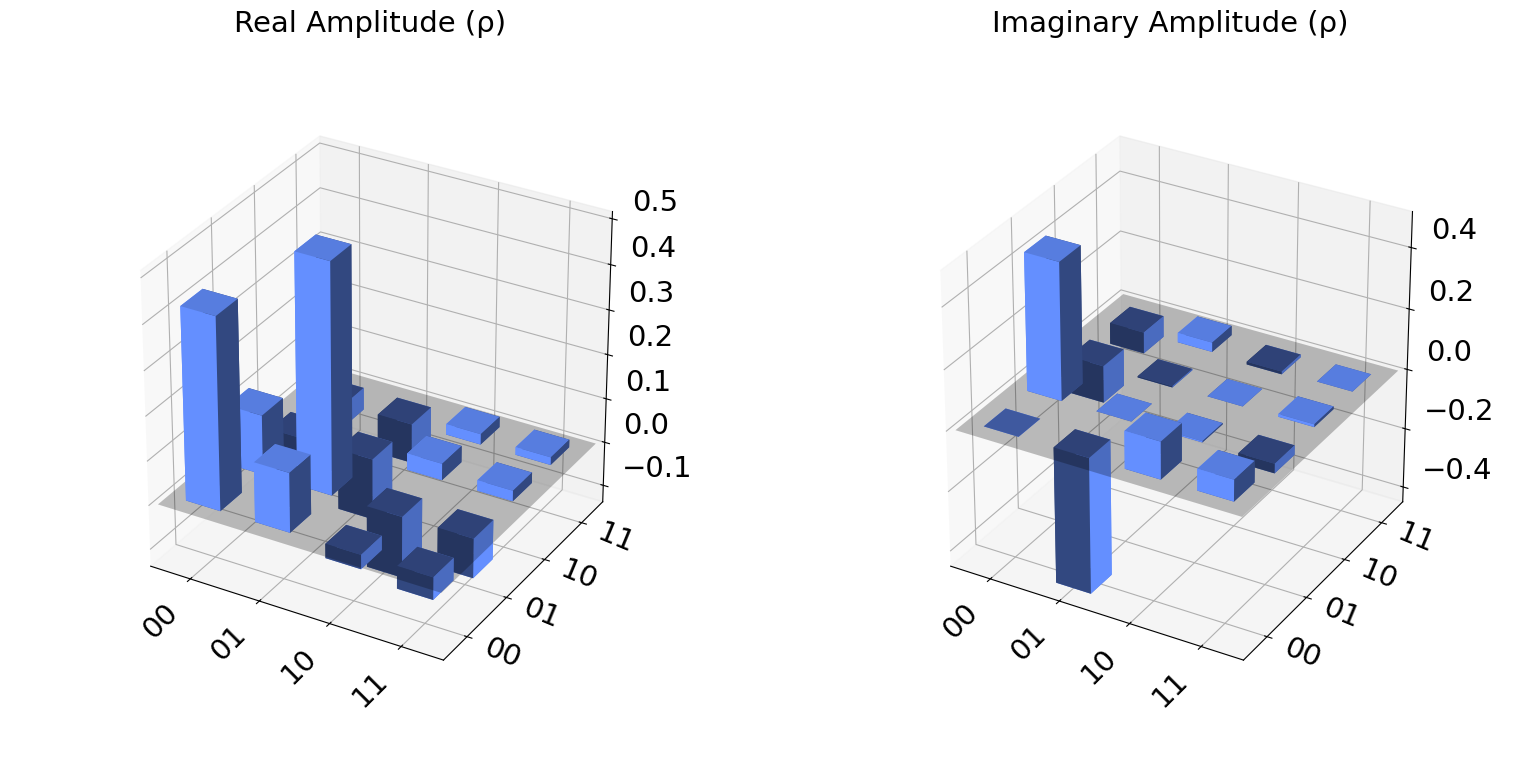

In [14]:
# Plot the State City 
plot_state_city(final_statevector)
plt.show()

In [15]:
# Compute and plot partial trace (tracing out qubit 1)
partial_trace_state = partial_trace(final_statevector, [1])
print("Partial Trace:\n", partial_trace_state)

Partial Trace:
 DensityMatrix([[0.46689063+0.j        , 0.15766384-0.44210146j],
               [0.15766384+0.44210146j, 0.53310937+0.j        ]],
              dims=(2,))


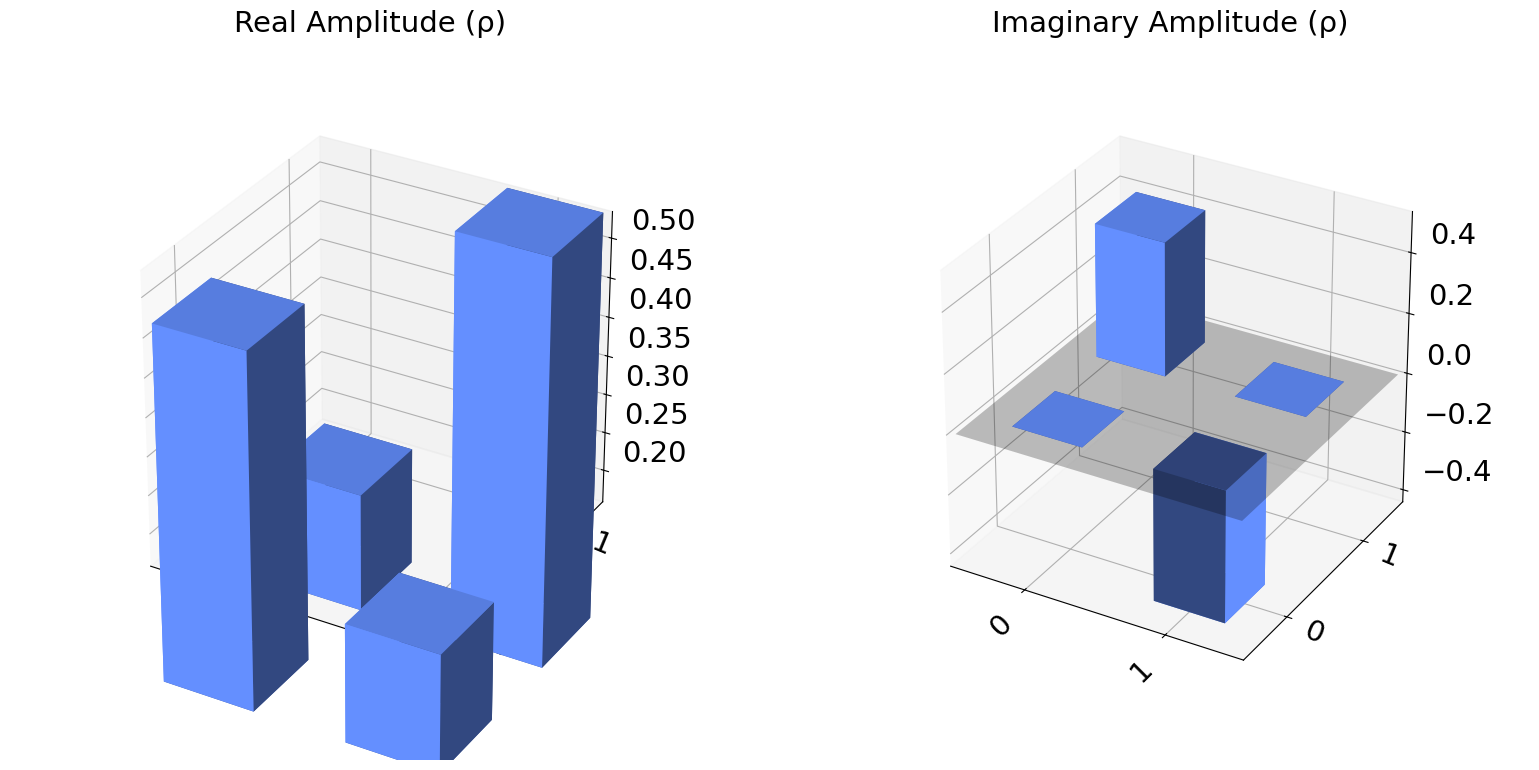

In [16]:
# Partial trace for advanced state inspection
plot_state_city(partial_trace_state)
plt.show()

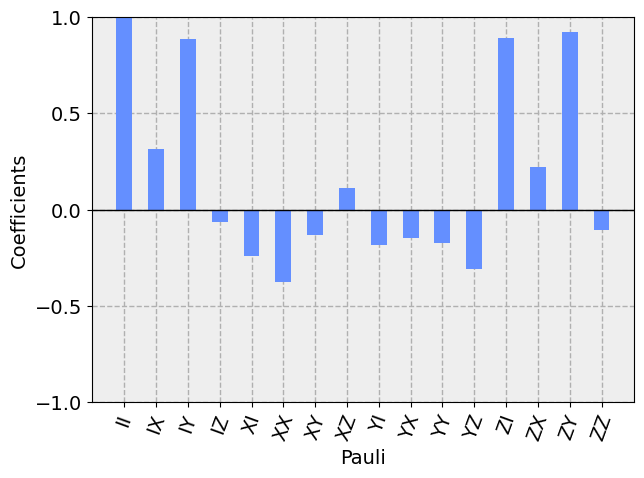

In [17]:
# Plot the Pauli vector 
plot_state_paulivec(final_statevector) 
plt.show()

In [18]:
# Create a measurement circuit
measurement_circuit = QuantumCircuit(num_qubits)
# Initialize the circuit with the final statevector
measurement_circuit.initialize(final_statevector.data, range(num_qubits))
# Add measurement to all qubits
measurement_circuit.measure_all()

In [19]:
# Execute the circuit
result = simulator.run(measurement_circuit).result()
counts = result.get_counts()

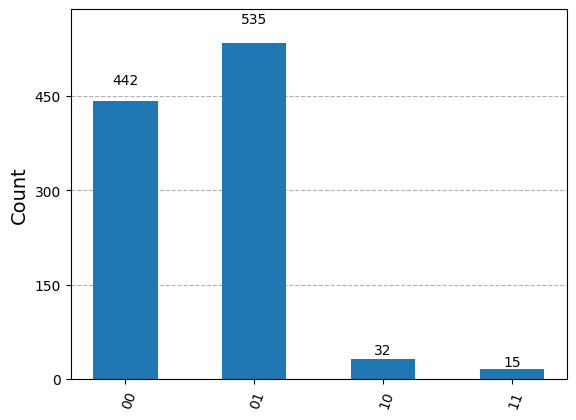

In [20]:
# Plot histogram 
plot_histogram(counts)
plt.show()